# Олимпиада

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
winter = pd.read_csv('winter.csv') 

## Блок 1

In [3]:
winter_76 = winter[winter['Year']==1976]
men = np.array(winter_76[winter_76['Gender']=='Men']['Discipline'].unique())
men

array(['Biathlon', 'Bobsleigh', 'Ice Hockey', 'Luge', 'Figure skating',
       'Speed skating', 'Alpine Skiing', 'Cross Country Skiing',
       'Nordic Combined', 'Ski Jumping'], dtype=object)

In [4]:
women = np.array(winter_76[winter_76['Gender']=='Women']['Discipline'].unique())
women

array(['Luge', 'Figure skating', 'Speed skating', 'Alpine Skiing',
       'Cross Country Skiing'], dtype=object)

In [5]:
#Дисциплины, в которых разыгравались только мужские комплекты наград
np.setdiff1d(men,women)

array(['Biathlon', 'Bobsleigh', 'Ice Hockey', 'Nordic Combined',
       'Ski Jumping'], dtype=object)

In [6]:
year = (1936,1994)
winter[winter['Year'].isin(year)]['Sport'].unique().size

6

## Блок 2

In [7]:
winter[winter['Year']==1936].groupby('Sport').count().shape[0]

4

In [8]:
old = winter[winter['Year']==1936]['Sport'].unique()
old

array(['Bobsleigh', 'Ice Hockey', 'Skating', 'Skiing'], dtype=object)

In [9]:
winter[winter['Year']==1994]['Sport'].unique().size

6

In [10]:
new = winter[winter['Year']==1994]['Sport'].unique()
new

array(['Biathlon', 'Bobsleigh', 'Ice Hockey', 'Luge', 'Skating', 'Skiing'],
      dtype=object)

In [11]:
#Общие виды спорта
np.intersect1d(old,new)

array(['Bobsleigh', 'Ice Hockey', 'Skating', 'Skiing'], dtype=object)

In [12]:
#Какие были в 1994 и не были в 1936
np.setdiff1d(new,old)

array(['Biathlon', 'Luge'], dtype=object)

In [13]:
#Когда появился биатлон
winter_36 = winter[winter['Year']>1936]
winter_36[winter_36['Sport']=='Biathlon'].loc[857, 'Year']

1960

## Блок 3

In [14]:
#Общее кол-во медалей за все годы мужчинами и женщинами
winter[['Gender', 'Medal']].groupby('Gender').count()

,Medal
Gender,
Men,3944
Women,1826


In [15]:
winter[['Gender', 'Medal', 'Athlete']].groupby([ 'Medal', 'Gender']).count().unstack()

Athlete      
Gender     Men Women
Medal               
Bronze    1315   604
Gold      1310   611
Silver    1319   611

In [16]:
pd.pivot_table(winter[['Gender', 'Medal', 'Athlete']], index='Medal', columns='Gender', aggfunc='count')

Athlete      
Gender     Men Women
Medal               
Bronze    1315   604
Gold      1310   611
Silver    1319   611

## Блок 4

In [17]:
winter_short = winter[(winter['Year']>1950) & (winter['Year']<1985)]
winter_short = winter_short.reset_index()  
winter_short.head()

,index,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,571,1952,Oslo,Bobsleigh,Bobsleigh,"FEIERABEND, Fritz",SUI,Men,Four-Man,Bronze
1,572,1952,Oslo,Bobsleigh,Bobsleigh,"FILIPPINI, André",SUI,Men,Four-Man,Bronze
2,573,1952,Oslo,Bobsleigh,Bobsleigh,"MADÖRIN, Albert",SUI,Men,Four-Man,Bronze
3,574,1952,Oslo,Bobsleigh,Bobsleigh,"WASER, Stephan",SUI,Men,Four-Man,Bronze
4,575,1952,Oslo,Bobsleigh,Bobsleigh,"KEMSER, Franz",FRG,Men,Four-Man,Gold


In [18]:
top_3 = np.array(winter_short.groupby('Country').count().Medal.nlargest(3).index)
top_3

array(['URS', 'USA', 'SWE'], dtype=object)

In [19]:
gold = winter_short[winter_short['Medal']=='Gold']
win_gold = pd.pivot_table(gold[gold['Country'].isin(top_3)][['Year', 'Country', 'Athlete']], index='Year', columns='Country', aggfunc='count')
win_gold

Athlete            
Country     SWE   URS   USA
Year                       
1952        NaN   NaN   4.0
1956        2.0  26.0   2.0
1960        5.0   7.0  19.0
1964        6.0  29.0   1.0
1968        3.0  26.0   1.0
1972        1.0  36.0   3.0
1976        NaN  38.0   3.0
1980        3.0  18.0  24.0
1984        7.0  29.0   4.0

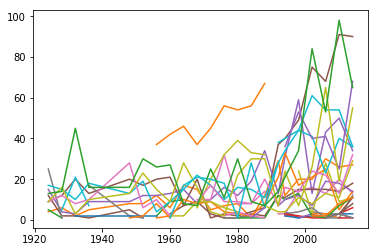

In [26]:
win_plot = pd.pivot_table(winter[['Year', 'Country', 'Medal']], index='Year', columns='Country', aggfunc='count')
plt.plot(win_plot);

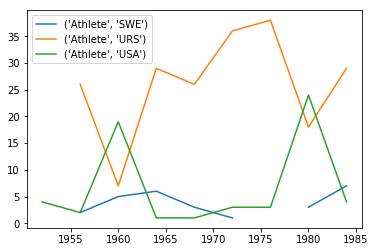

In [30]:
plt.plot(win_gold)
plt.legend(win_gold.columns);